¡GIF animado exportado correctamente en '../resultados/filtros_animados.gif'!


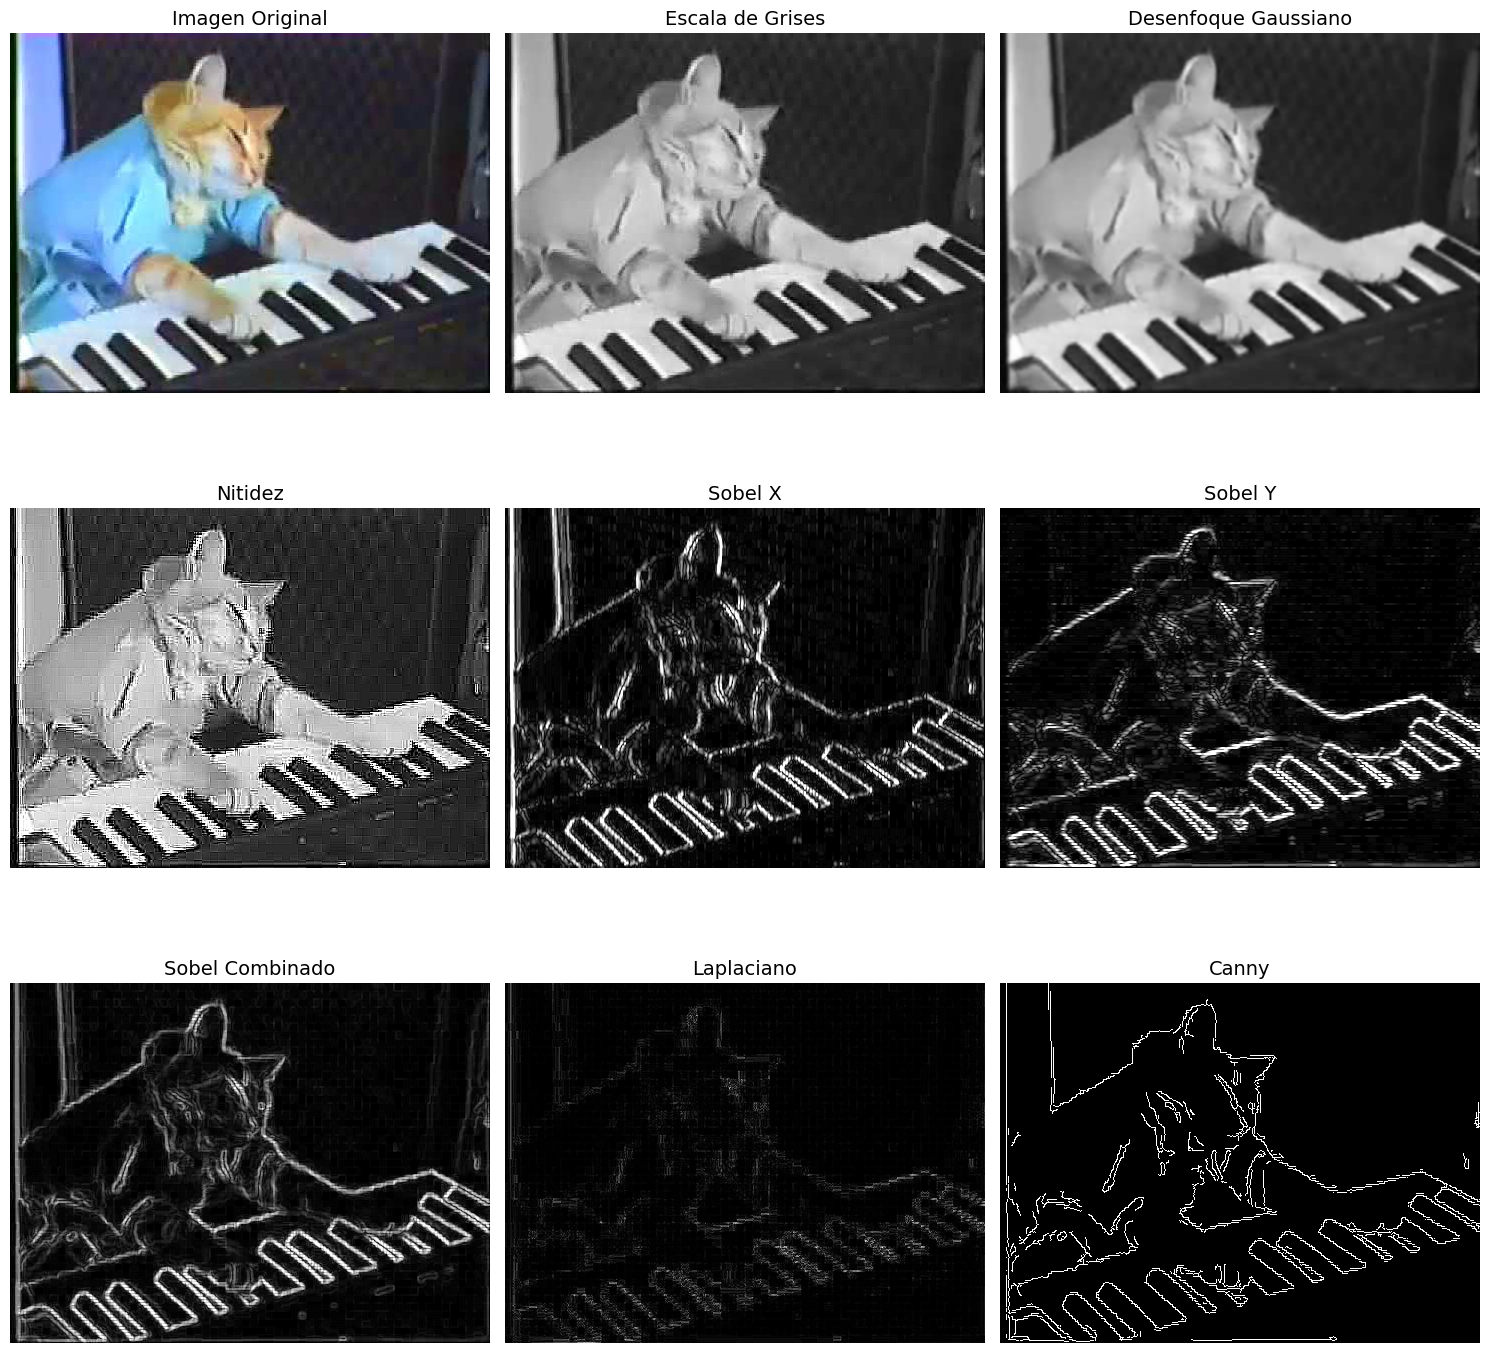

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Crear carpeta de resultados si no existe
os.makedirs('../resultados', exist_ok=True)

# Cargar imagen a color
imagen = cv2.imread('cat.jpg')
if imagen is None:
    print("Error al cargar la imagen. Verifica la ruta.")
else:
    # Convertir a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Aplicar filtros convolucionales
    blur = cv2.GaussianBlur(gris, (5, 5), 0)
    
    kernel_sharpening = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened = cv2.filter2D(gris, -1, kernel_sharpening)
    
    sobelx = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    
    sobely = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=3)
    sobely = cv2.convertScaleAbs(sobely)
    
    sobel_combinado = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
    
    laplaciano = cv2.Laplacian(gris, cv2.CV_64F)
    laplaciano = cv2.convertScaleAbs(laplaciano)
    
    canny = cv2.Canny(gris, 100, 200)
    
    imagenes = [
        cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB),
        gris,
        blur,
        sharpened,
        sobelx,
        sobely,
        sobel_combinado,
        laplaciano,
        canny
    ]
    
    titulos = [
        'Imagen Original',
        'Escala de Grises',
        'Desenfoque Gaussiano',
        'Nitidez',
        'Sobel X',
        'Sobel Y',
        'Sobel Combinado',
        'Laplaciano',
        'Canny'
    ]
    
    # Visualización estática
    plt.figure(figsize=(15, 15))
    for i in range(len(imagenes)):
        plt.subplot(3, 3, i+1)
        if i == 0:
            plt.imshow(imagenes[i])
        else:
            plt.imshow(imagenes[i], cmap='gray')
        plt.title(titulos[i], fontsize=14)  # Título más grande
        plt.axis('off')
    plt.tight_layout()
    
    # Animación corregida
    fig, ax = plt.subplots(figsize=(8, 8))
    imagen_mostrada = ax.imshow(imagenes[0])  # Inicializar solo una vez
    titulo = ax.set_title(titulos[0], fontsize=36)  # Título más grande en la animación
    ax.axis('off')
    plt.tight_layout()

    def update(frame):
        if frame == 0:
            imagen_mostrada.set_data(imagenes[frame])
            imagen_mostrada.set_cmap(None)
        else:
            imagen_mostrada.set_data(imagenes[frame])
            imagen_mostrada.set_cmap('gray')
        titulo.set_text(titulos[frame])
        return imagen_mostrada, titulo

    ani = FuncAnimation(
        fig,
        update,
        frames=len(imagenes),
        interval=1000,  # 1 segundo por imagen
        blit=False  # <-- Ojo: blit=False soluciona el problema
    )

    # Guardar como GIF
    writer = PillowWriter(fps=1)
    ani.save('../resultados/filtros_animados.gif', writer=writer, dpi=100)
    plt.close(fig)

    print("¡GIF animado exportado correctamente en '../resultados/filtros_animados.gif'!")
